In [37]:
#test reseaux de neuronnes

In [73]:
import pandas as pd
import numpy as np
import pandas_bokeh
pandas_bokeh.output_notebook()
pd.set_option("plotting.backend", "pandas_bokeh")

Loading BokehJS ...

In [74]:
uber = pd.read_csv('../uber_data.csv', parse_dates=True, index_col = 0)
uber

,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
pickup_dt,,,,,,,,,,,,
2015-01-01 01:00:00,Bronx,152,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2015-01-01 01:00:00,Brooklyn,1519,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2015-01-01 01:00:00,EWR,0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2015-01-01 01:00:00,Manhattan,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2015-01-01 01:00:00,Queens,405,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-30 23:00:00,EWR,0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
2015-06-30 23:00:00,Manhattan,3828,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
2015-06-30 23:00:00,Queens,580,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


In [75]:
uber_man = uber[uber['borough'] == 'Manhattan'].dropna().drop('borough', axis=1)
uber_man

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
pickup_dt,,,,,,,,,,,
2015-01-01 01:00:00,5258,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
2015-01-01 02:00:00,4345,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,Y
2015-01-01 03:00:00,4577,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,Y
2015-01-01 04:00:00,3003,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,Y
2015-01-01 05:00:00,1313,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
2015-06-30 19:00:00,4585,5.0,10.0,80.0,58.0,1012.5,0.0,0.0,0.0,0.0,N
2015-06-30 20:00:00,4210,8.0,10.0,80.0,58.0,1012.4,0.0,0.0,0.0,0.0,N
2015-06-30 21:00:00,4313,7.0,10.0,76.0,61.0,1012.4,0.0,0.0,0.0,0.0,N


In [76]:
uber_man = uber_man.drop('hday',axis=1)

In [77]:
training = uber_man[:-720]
training

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickup_dt,,,,,,,,,,
2015-01-01 01:00:00,5258,5.000000,10.000000,30.000000,7.000000,1023.5,0.000000,0.0,0.0,0.0
2015-01-01 02:00:00,4345,3.000000,10.000000,30.000000,6.000000,1023.0,0.000000,0.0,0.0,0.0
2015-01-01 03:00:00,4577,5.000000,10.000000,30.000000,8.000000,1022.3,0.000000,0.0,0.0,0.0
2015-01-01 04:00:00,3003,5.000000,10.000000,29.000000,9.000000,1022.0,0.000000,0.0,0.0,0.0
2015-01-01 05:00:00,1313,5.000000,10.000000,28.000000,9.000000,1021.8,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2015-05-31 19:00:00,4944,4.500000,6.666667,75.333333,70.333333,1016.3,0.030000,0.0,0.0,0.0
2015-05-31 20:00:00,4100,8.000000,5.900000,74.500000,65.500000,1015.9,0.015000,0.0,0.0,0.0
2015-05-31 21:00:00,3639,6.666667,1.450000,70.666667,68.000000,1016.9,0.280000,0.0,0.0,0.0


In [78]:
testing = uber_man[-720:]
testing

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickup_dt,,,,,,,,,,
2015-06-01 00:00:00,1301,2.50,3.4,69.00,66.50,1017.2,0.045,1.21,0.0,0.0
2015-06-01 01:00:00,704,6.25,3.5,68.75,66.25,1018.0,0.080,0.00,0.0,0.0
2015-06-01 02:00:00,488,8.00,9.1,65.00,62.00,1018.7,0.060,0.00,0.0,0.0
2015-06-01 03:00:00,349,8.00,9.1,63.00,59.00,1019.9,0.010,0.00,0.0,0.0
2015-06-01 04:00:00,453,9.00,10.0,59.00,56.00,1020.2,0.060,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2015-06-30 19:00:00,4585,5.00,10.0,80.00,58.00,1012.5,0.000,0.00,0.0,0.0
2015-06-30 20:00:00,4210,8.00,10.0,80.00,58.00,1012.4,0.000,0.00,0.0,0.0
2015-06-30 21:00:00,4313,7.00,10.0,76.00,61.00,1012.4,0.000,0.00,0.0,0.0


In [79]:
from sklearn.model_selection import TimeSeriesSplit
from sktime.forecasting.model_selection import temporal_train_test_split

    
train, test = temporal_train_test_split(training, test_size = 720)

X_train = train.drop('pickups', axis=1)
y_train = train['pickups']
X_test = test.drop('pickups',axis=1)
y_test = test['pickups']

In [80]:
pd.concat([train['pickups'],test['pickups']]).plot()

Figure(id='1972', ...)

In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train['pickups'] = scaler.fit_transform(train)
train.head()

/Users/jerem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickup_dt,,,,,,,,,,
2015-01-01 01:00:00,0.768489,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0
2015-01-01 02:00:00,0.635048,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0
2015-01-01 03:00:00,0.668956,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0
2015-01-01 04:00:00,0.438907,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0
2015-01-01 05:00:00,0.191903,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0


In [82]:
train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted['pickups'].shift(-1, freq='H')
train_shifted.head(10)

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,y_t+1
pickup_dt,,,,,,,,,,,
2015-01-01 01:00:00,0.768489,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,0.635048
2015-01-01 02:00:00,0.635048,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,0.668956
2015-01-01 03:00:00,0.668956,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,0.438907
2015-01-01 04:00:00,0.438907,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,0.191903
2015-01-01 05:00:00,0.191903,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,0.098217
2015-01-01 06:00:00,0.098217,10.0,10.0,28.0,8.0,1020.7,0.0,0.0,0.0,0.0,0.062993
2015-01-01 07:00:00,0.062993,9.0,10.0,28.0,10.0,1020.5,0.0,0.0,0.0,0.0,0.048085
2015-01-01 08:00:00,0.048085,7.0,10.0,27.0,9.0,1020.5,0.0,0.0,0.0,0.0,0.046624
2015-01-01 09:00:00,0.046624,3.0,10.0,27.0,7.0,1020.0,0.0,0.0,0.0,0.0,0.061386


In [48]:
T = 10
HORIZON = 1

In [49]:
for t in range(1, T+1):
    train_shifted['lag_'+str(T-t)] = train_shifted['pickups'].shift(T-t, freq='H')

train_shifted.head(10)

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,...,lag_9,lag_8,lag_7,lag_6,lag_5,lag_4,lag_3,lag_2,lag_1,lag_0
pickup_dt,,,,,,,,,,,,,,,,,,,,,
2015-01-01 01:00:00,0.768489,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.768489
2015-01-01 02:00:00,0.635048,3.0,10.0,30.0,6.0,1023.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.768489,0.635048
2015-01-01 03:00:00,0.668956,5.0,10.0,30.0,8.0,1022.3,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.768489,0.635048,0.668956
2015-01-01 04:00:00,0.438907,5.0,10.0,29.0,9.0,1022.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.768489,0.635048,0.668956,0.438907
2015-01-01 05:00:00,0.191903,5.0,10.0,28.0,9.0,1021.8,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,0.768489,0.635048,0.668956,0.438907,0.191903
2015-01-01 06:00:00,0.098217,10.0,10.0,28.0,8.0,1020.7,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.768489,0.635048,0.668956,0.438907,0.191903,0.098217
2015-01-01 07:00:00,0.062993,9.0,10.0,28.0,10.0,1020.5,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,0.768489,0.635048,0.668956,0.438907,0.191903,0.098217,0.062993
2015-01-01 08:00:00,0.048085,7.0,10.0,27.0,9.0,1020.5,0.0,0.0,0.0,0.0,...,NaN,NaN,0.768489,0.635048,0.668956,0.438907,0.191903,0.098217,0.062993,0.048085
2015-01-01 09:00:00,0.046624,3.0,10.0,27.0,7.0,1020.0,0.0,0.0,0.0,0.0,...,NaN,0.768489,0.635048,0.668956,0.438907,0.191903,0.098217,0.062993,0.048085,0.046624


In [50]:
train_shifted = train_shifted.dropna()

In [51]:
y_train = train_shifted[['y_t+1']].to_numpy()
y_train.shape

(2893, 1)

In [52]:
X_train = train_shifted[['lag_'+str(T-t) for t in range(1, T+1)]].to_numpy()
X_train = X_train[... , np.newaxis]
X_train.shape

(2893, 10, 1)

In [53]:
test['pickups'] = scaler.transform(test)
test.head()

/Users/jerem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickup_dt,,,,,,,,,,
2015-05-02 00:00:00,0.735457,5.0,10.0,51.0,39.0,1014.7,0.0,0.0,0.0,0.0
2015-05-02 01:00:00,0.533031,6.0,10.0,49.0,39.0,1015.3,0.0,0.0,0.0,0.0
2015-05-02 02:00:00,0.330167,3.0,10.0,50.0,39.0,1015.4,0.0,0.0,0.0,0.0
2015-05-02 03:00:00,0.214411,0.0,10.0,50.0,39.0,1015.3,0.0,0.0,0.0,0.0
2015-05-02 04:00:00,0.157264,0.0,10.0,49.0,39.0,1015.3,0.0,0.0,0.0,0.0


In [54]:
valid_shifted = test.copy()
valid_shifted['y+1'] = valid_shifted['pickups'].shift(-1, freq='H')
for t in range(1, T+1):
    valid_shifted['lag_'+str(T-t)] = valid_shifted['pickups'].shift(T-t, freq='H')
valid_shifted = valid_shifted.dropna(how='any')
y_valid = valid_shifted['y+1'].to_numpy()
X_valid = valid_shifted[['lag_'+str(T-t) for t in range(1, T+1)]].to_numpy()
X_valid = X_valid[..., np.newaxis]

In [55]:
y_valid.shape

(710,)

In [56]:
X_valid.shape

(710, 10, 1)

In [57]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [58]:
LATENT_DIM = 5
KERNEL_SIZE = 2
BATCH_SIZE = 32
EPOCHS = 100

In [59]:
model = Sequential()
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=1, input_shape=(T, 1)))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=2))
model.add(Conv1D(LATENT_DIM, kernel_size=KERNEL_SIZE, padding='causal', strides=1, activation='relu', dilation_rate=4))
model.add(Flatten())
model.add(Dense(HORIZON, activation='linear'))

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 10, 5)             15        
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 10, 5)             55        
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 10, 5)             55        
_________________________________________________________________
flatten_1 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='Adam', loss='mae')

In [62]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=50)
best_val = ModelCheckpoint('cp/model_{epoch:02d}.h5', save_best_only=True, mode='min', save_freq=1)

In [63]:
history = model.fit(X_train,
          y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop, best_val],
          verbose=1)

Epoch 1/100
91/91 [==============================] - 0s 5ms/step - loss: 0.2238 - val_loss: 0.1804
Epoch 2/100
 1/91 [..............................] - ETA: 0s - loss: 0.1569WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.1571 - val_loss: 0.1553
Epoch 3/100
 1/91 [..............................] - ETA: 0s - loss: 0.1395WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.1347 - val_loss: 0.1309
Epoch 4/100
 1/91 [..............................] - ETA: 0s - loss: 0.1487WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.1107 - val_loss: 0.1027
Epoch 5/100
20/91 [=====>........................] - ETA: 0s - loss: 0.0934WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0866 - val_loss: 0.0749
Epoch 6/100
20/91 [=====>........................] - ETA: 0s - loss: 0.0723WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0703 - val_loss: 0.0647
Epoch 7/100
39/91 [===========>..................] - ETA: 0s - loss: 0.0612WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0596 - val_loss: 0.0591
Epoch 8/100
39/91 [===========>..................] - ETA: 0s - loss: 0.0531WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0536 - val_loss: 0.0582
Epoch 9/100
40/91 [============>.................] - ETA: 0s - loss: 0.0486WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0488 - val_loss: 0.0518
Epoch 10/100
56/91 [=================>............] - ETA: 0s - loss: 0.0464WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0461 - val_loss: 0.0488
Epoch 11/100
56/91 [=================>............] - ETA: 0s - loss: 0.0438WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0436 - val_loss: 0.0467
Epoch 12/100
74/91 [=======================>......] - ETA: 0s - loss: 0.0421WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0424 - val_loss: 0.0474
Epoch 13/100
76/91 [========================>.....] - ETA: 0s - loss: 0.0418WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0411 - val_loss: 0.0497
Epoch 14/100
91/91 [==============================] - 0s 3ms/step - loss: 0.0397 - val_loss: 0.0430
Epoch 15/100


91/91 [==============================] - 0s 4ms/step - loss: 0.0377 - val_loss: 0.0449
Epoch 16/100
 1/91 [..............................] - ETA: 0s - loss: 0.0323WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0376 - val_loss: 0.0404
Epoch 17/100
 1/91 [..............................] - ETA: 0s - loss: 0.0298WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0361 - val_loss: 0.0515
Epoch 18/100
 1/91 [..............................] - ETA: 0s - loss: 0.0532WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0356 - val_loss: 0.0396
Epoch 19/100
18/91 [====>.........................] - ETA: 0s - loss: 0.0360WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 5ms/step - loss: 0.0346 - val_loss: 0.0398
Epoch 20/100
18/91 [====>.........................] - ETA: 0s - loss: 0.0325WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0341 - val_loss: 0.0419
Epoch 21/100
36/91 [==========>...................] - ETA: 0s - loss: 0.0341WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0335 - val_loss: 0.0413
Epoch 22/100
38/91 [===========>..................] - ETA: 0s - loss: 0.0338WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0333 - val_loss: 0.0372
Epoch 23/100
37/91 [===========>..................] - ETA: 0s - loss: 0.0342WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0328 - val_loss: 0.0363
Epoch 24/100
51/91 [===============>..............] - ETA: 0s - loss: 0.0317WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0326 - val_loss: 0.0406
Epoch 25/100
54/91 [================>.............] - ETA: 0s - loss: 0.0324WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0325 - val_loss: 0.0354
Epoch 26/100
69/91 [=====================>........] - ETA: 0s - loss: 0.0317WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0315 - val_loss: 0.0351
Epoch 27/100
67/91 [=====================>........] - ETA: 0s - loss: 0.0315WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0317 - val_loss: 0.0354
Epoch 28/100
73/91 [=======================>......] - ETA: 0s - loss: 0.0303WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 5ms/step - loss: 0.0311 - val_loss: 0.0371
Epoch 29/100
90/91 [============================>.] - ETA: 0s - loss: 0.0310WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0309 - val_loss: 0.0349
Epoch 30/100
91/91 [==============================] - 0s 3ms/step - loss: 0.0304 - val_loss: 0.0346
Epoch 31/100
 1/91 [..............................] - ETA: 0s - loss: 0.0282WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0303 - val_loss: 0.0364
Epoch 32/100
 1/91 [..............................] - ETA: 0s - loss: 0.0262WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0303 - val_loss: 0.0335
Epoch 33/100
 1/91 [..............................] - ETA: 0s - loss: 0.0270WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0308 - val_loss: 0.0338
Epoch 34/100
20/91 [=====>........................] - ETA: 0s - loss: 0.0314WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0304 - val_loss: 0.0334
Epoch 35/100
20/91 [=====>........................] - ETA: 0s - loss: 0.0267WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0306 - val_loss: 0.0333
Epoch 36/100
41/91 [============>.................] - ETA: 0s - loss: 0.0288WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0296 - val_loss: 0.0342
Epoch 37/100
47/91 [==============>...............] - ETA: 0s - loss: 0.0288WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0295 - val_loss: 0.0325
Epoch 38/100
50/91 [===============>..............] - ETA: 0s - loss: 0.0296WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0298 - val_loss: 0.0326
Epoch 39/100
57/91 [=================>............] - ETA: 0s - loss: 0.0294WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0292 - val_loss: 0.0323
Epoch 40/100
57/91 [=================>............] - ETA: 0s - loss: 0.0284WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0290 - val_loss: 0.0326
Epoch 41/100
71/91 [======================>.......] - ETA: 0s - loss: 0.0288WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.0355
Epoch 42/100
74/91 [=======================>......] - ETA: 0s - loss: 0.0296WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0296 - val_loss: 0.0320
Epoch 43/100
80/91 [=========================>....] - ETA: 0s - loss: 0.0287WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0288 - val_loss: 0.0331
Epoch 44/100
91/91 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.0322
Epoch 45/100
 1/91 [..............................] - ETA: 0s - loss: 0.0370WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.0315
Epoch 46/100
 1/91 [..............................] - ETA: 0s - loss: 0.0209WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0289 - val_loss: 0.0313
Epoch 47/100
 1/91 [..............................] - ETA: 0s - loss: 0.0290WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0291 - val_loss: 0.0316
Epoch 48/100
20/91 [=====>........................] - ETA: 0s - loss: 0.0285WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0287 - val_loss: 0.0342
Epoch 49/100
20/91 [=====>........................] - ETA: 0s - loss: 0.0278WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.0332
Epoch 50/100
40/91 [============>.................] - ETA: 0s - loss: 0.0277WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.0329
Epoch 51/100
37/91 [===========>..................] - ETA: 0s - loss: 0.0275WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0282 - val_loss: 0.0319
Epoch 52/100
56/91 [=================>............] - ETA: 0s - loss: 0.0278WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.0317
Epoch 53/100
56/91 [=================>............] - ETA: 0s - loss: 0.0292WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0286 - val_loss: 0.0321
Epoch 54/100
56/91 [=================>............] - ETA: 0s - loss: 0.0284WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.0320
Epoch 55/100
75/91 [=======================>......] - ETA: 0s - loss: 0.0289WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0285 - val_loss: 0.0318
Epoch 56/100
79/91 [=========================>....] - ETA: 0s - loss: 0.0284WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0284 - val_loss: 0.0307
Epoch 57/100
91/91 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.0313
Epoch 58/100
 1/91 [..............................] - ETA: 0s - loss: 0.0342WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0281 - val_loss: 0.0310
Epoch 59/100
 1/91 [..............................] - ETA: 0s - loss: 0.0201WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.0309
Epoch 60/100
 1/91 [..............................] - ETA: 0s - loss: 0.0311WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.0324
Epoch 61/100
19/91 [=====>........................] - ETA: 0s - loss: 0.0271WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0279 - val_loss: 0.0308
Epoch 62/100
21/91 [=====>........................] - ETA: 0s - loss: 0.0264WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.0337
Epoch 63/100
20/91 [=====>........................] - ETA: 0s - loss: 0.0282WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.0306
Epoch 64/100
38/91 [===========>..................] - ETA: 0s - loss: 0.0268WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.0354
Epoch 65/100
39/91 [===========>..................] - ETA: 0s - loss: 0.0263WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.0311
Epoch 66/100
58/91 [==================>...........] - ETA: 0s - loss: 0.0274WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0311
Epoch 67/100
56/91 [=================>............] - ETA: 0s - loss: 0.0276WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0278 - val_loss: 0.0302
Epoch 68/100
70/91 [======================>.......] - ETA: 0s - loss: 0.0273WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0273 - val_loss: 0.0305
Epoch 69/100
74/91 [=======================>......] - ETA: 0s - loss: 0.0273WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.0306
Epoch 70/100
74/91 [=======================>......] - ETA: 0s - loss: 0.0262WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.0322
Epoch 71/100
91/91 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0302
Epoch 72/100
 1/91 [..............................] - ETA: 0s - loss: 0.0248WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.0301
Epoch 73/100
 1/91 [..............................] - ETA: 0s - loss: 0.0272WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0303
Epoch 74/100
 1/91 [..............................] - ETA: 0s - loss: 0.0245WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.0299
Epoch 75/100
21/91 [=====>........................] - ETA: 0s - loss: 0.0262WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0273 - val_loss: 0.0299
Epoch 76/100
21/91 [=====>........................] - ETA: 0s - loss: 0.0264WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0305
Epoch 77/100
39/91 [===========>..................] - ETA: 0s - loss: 0.0264WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0274 - val_loss: 0.0305
Epoch 78/100
39/91 [===========>..................] - ETA: 0s - loss: 0.0277WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0269 - val_loss: 0.0322
Epoch 79/100
57/91 [=================>............] - ETA: 0s - loss: 0.0269WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0299
Epoch 80/100
56/91 [=================>............] - ETA: 0s - loss: 0.0265WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.0303
Epoch 81/100
57/91 [=================>............] - ETA: 0s - loss: 0.0271WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0306
Epoch 82/100
77/91 [========================>.....] - ETA: 0s - loss: 0.0266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.0299
Epoch 83/100
78/91 [========================>.....] - ETA: 0s - loss: 0.0280WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0300
Epoch 84/100
91/91 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.0296
Epoch 85/100
 1/91 [..............................] - ETA: 0s - loss: 0.0215WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.0296
Epoch 86/100
 1/91 [..............................] - ETA: 0s - loss: 0.0292WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0297
Epoch 87/100
 1/91 [..............................] - ETA: 0s - loss: 0.0256WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.0338
Epoch 88/100
20/91 [=====>........................] - ETA: 0s - loss: 0.0266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0276 - val_loss: 0.0299
Epoch 89/100
19/91 [=====>........................] - ETA: 0s - loss: 0.0256WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.0302
Epoch 90/100
39/91 [===========>..................] - ETA: 0s - loss: 0.0260WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0272 - val_loss: 0.0299
Epoch 91/100
36/91 [==========>...................] - ETA: 0s - loss: 0.0270WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.0300
Epoch 92/100
38/91 [===========>..................] - ETA: 0s - loss: 0.0274WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0265 - val_loss: 0.0309
Epoch 93/100
55/91 [=================>............] - ETA: 0s - loss: 0.0263WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 4ms/step - loss: 0.0265 - val_loss: 0.0295
Epoch 94/100
57/91 [=================>............] - ETA: 0s - loss: 0.0272WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0267 - val_loss: 0.0297
Epoch 95/100
74/91 [=======================>......] - ETA: 0s - loss: 0.0266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.0297
Epoch 96/100
71/91 [======================>.......] - ETA: 0s - loss: 0.0273WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0270 - val_loss: 0.0301
Epoch 97/100
88/91 [============================>.] - ETA: 0s - loss: 0.0270WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.0312
Epoch 98/100
91/91 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.0294
Epoch 99/100
 1/91 [..............................] - ETA: 0s - loss: 0.0266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0268 - val_loss: 0.0298
Epoch 100/100
 1/91 [..............................] - ETA: 0s - loss: 0.0266WARNING:tensorflow:Can save best model only with val_loss available, skipping.


91/91 [==============================] - 0s 3ms/step - loss: 0.0271 - val_loss: 0.0301


In [64]:
best_epoch = np.argmin(np.array(history.history['val_loss']))+1
model.load_weights("cp/model_{:02d}.h5".format(best_epoch))

OSError: Unable to open file (unable to open file: name = 'cp/model_98.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [65]:
import matplotlib.pyplot as plt

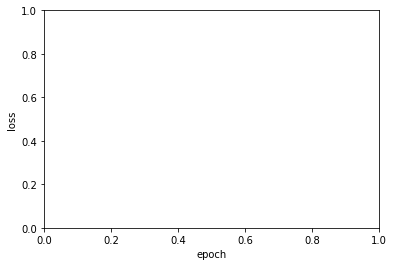

In [66]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [67]:
testing['pickups'] = scaler.transform(testing)
testing.head()

/Users/jerem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
pickup_dt,,,,,,,,,,
2015-06-01 00:00:00,0.190149,2.50,3.4,69.00,66.50,1017.2,0.045,1.21,0.0,0.0
2015-06-01 01:00:00,0.102894,6.25,3.5,68.75,66.25,1018.0,0.080,0.00,0.0,0.0
2015-06-01 02:00:00,0.071324,8.00,9.1,65.00,62.00,1018.7,0.060,0.00,0.0,0.0
2015-06-01 03:00:00,0.051008,8.00,9.1,63.00,59.00,1019.9,0.010,0.00,0.0,0.0
2015-06-01 04:00:00,0.066209,9.00,10.0,59.00,56.00,1020.2,0.060,0.00,0.0,0.0


In [68]:
test_shifted = testing.copy()
test_shifted['y_t+1'] = test_shifted['pickups'].shift(-1, freq='H')
for t in range(1, T+1):
    test_shifted['lag_'+str(T-t)] = test_shifted['pickups'].shift(T-t, freq='H')
test_shifted = test_shifted.dropna(how='any')
y_test = test_shifted['y_t+1'].to_numpy()
X_test = test_shifted[['lag_'+str(T-t) for t in range(1, T+1)]].to_numpy()
X_test = X_test[... , np.newaxis]

In [69]:
predictions = model.predict(X_test)
predictions

array([[0.45519683],
       [0.40548882],
       [0.628548  ],
       [0.53854936],
       [0.45647278],
       [0.320327  ],
       [0.37072337],
       [0.49517643],
       [0.59652627],
       [0.70834494],
       [0.9105017 ],
       [0.7253717 ],
       [0.66009635],
       [0.59923124],
       [0.4168443 ],
       [0.15632391],
       [0.0914068 ],
       [0.04393109],
       [0.05846002],
       [0.06502878],
       [0.11859468],
       [0.25693035],
       [0.4359976 ],
       [0.520837  ],
       [0.47534657],
       [0.3654684 ],
       [0.35426563],
       [0.3949573 ],
       [0.38895592],
       [0.427329  ],
       [0.60973305],
       [0.6614065 ],
       [0.7792762 ],
       [0.8309679 ],
       [0.91105473],
       [0.7465824 ],
       [0.780876  ],
       [0.6986255 ],
       [0.47319955],
       [0.2022056 ],
       [0.1033091 ],
       [0.04180973],
       [0.07282642],
       [0.06590117],
       [0.11536878],
       [0.24044296],
       [0.4155642 ],
       [0.472

In [70]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
#eval_df['actual'] = scaler.inverse_transform(eval_df['actual'])
#eval_df['prediction'] = scaler.inver_transform(eval_df['prediction'])
#eval_df[['prediction', 'actual']] = scaler.inverse_transform(eval_df[['prediction', 'actual']])
eval_df.head()

,timestamp,h,prediction,actual
0,2015-06-01 09:00:00,t+1,0.455197,0.466969
1,2015-06-01 10:00:00,t+1,0.405489,0.541362
2,2015-06-01 11:00:00,t+1,0.628548,0.545016
3,2015-06-01 12:00:00,t+1,0.538549,0.452938
4,2015-06-01 13:00:00,t+1,0.456473,0.385852


In [71]:
def smape_perso(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
smape_perso(eval_df['prediction'], eval_df['actual'])

12.282531890881273

In [72]:
eval_df[['prediction','actual']].plot()

Figure(id='1814', ...)